In [5]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
import pandas_ml as pdml
from sklearn.preprocessing import scale
import random

In [6]:
df=pd.read_csv('creditcard.csv')
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,23655.0,1.048723,-0.281026,0.559724,1.094666,0.117198,1.595472,-0.777608,0.375995,1.882155,...,-0.014831,0.192375,-0.341477,-1.744970,0.573175,-0.169795,0.034638,0.012084,86.60,0
1,160200.0,1.989283,-0.441792,0.164046,0.357568,-1.041894,-0.509930,-0.847575,-0.015956,1.279815,...,0.037405,0.319792,0.320162,0.092255,-0.573188,0.477399,-0.005957,-0.037567,1.00,0
2,155138.0,-3.061419,2.105596,-1.036532,0.805934,0.061004,-0.403649,0.350054,1.016494,-0.984207,...,0.076445,0.251194,-0.558939,-0.356169,1.302679,-0.191992,-0.216885,-0.232026,20.22,0
3,143005.0,-2.777881,3.013665,-2.680859,-0.636342,-0.787523,-1.142648,-0.653469,1.822381,0.307979,...,-0.322151,-1.008189,0.315580,0.537077,-0.099494,0.104214,-0.170954,-0.163253,11.99,0
4,64336.0,-1.259152,-0.487136,2.386151,-0.567041,0.064334,0.660929,-0.876044,0.418149,1.303231,...,-0.029078,0.418090,-0.420255,-0.344435,-0.374592,0.936623,-0.050626,0.130630,12.67,0


In [7]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


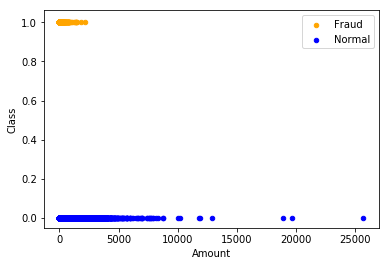

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [8]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

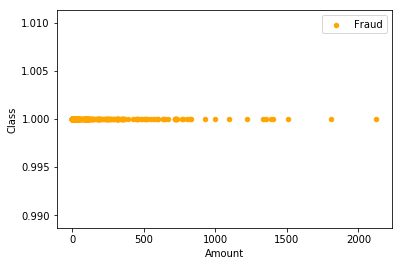

In [9]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

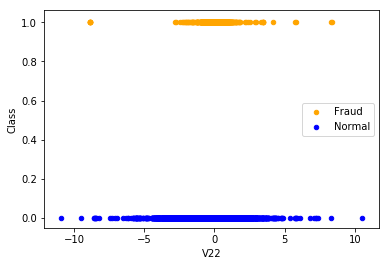

This feature may not be very important because of the similar distribution.


In [10]:
ax =frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

# Logistic Regression


In [11]:
from sklearn import datasets,linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [12]:
X=df.iloc[:,:-1]
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)


In [13]:
print("X and y sizes, respectively:", len(X), len(y))
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 159 0.00159505632856154
Number of frauds on y_train: 333 0.001798794321643871


In [14]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train,y_train)
print("score:",logistic.score(X_test,y_test))

c:\users\jenisha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score: 0.9989065337118667


In [15]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      99474    50    99524
True          59   100      159
__all__    99533   150    99683


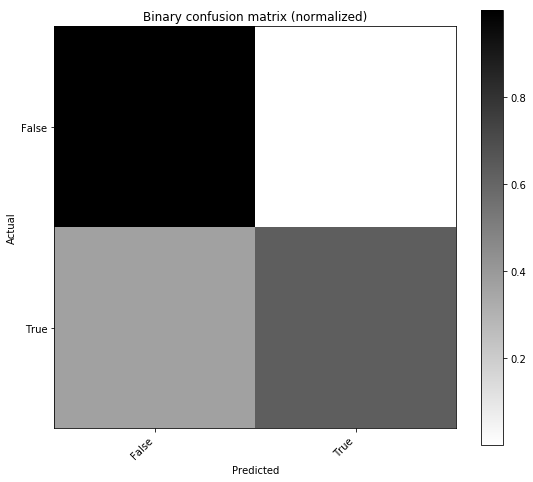

population: 99683
P: 159
N: 99524
PositiveTest: 150
NegativeTest: 99533
TP: 100
TN: 99474
FP: 50
FN: 59
TPR: 0.6289308176100629
TNR: 0.999497608617017
PPV: 0.6666666666666666
NPV: 0.999407231772377
FPR: 0.0005023913829829991
FDR: 0.3333333333333333
FNR: 0.3710691823899371
ACC: 0.9989065337118667
F1_score: 0.6472491909385113
MCC: 0.6469774120840572
informedness: 0.6284284262270798
markedness: 0.6660738984390435
prevalence: 0.00159505632856154
LRP: 1251.874213836478
LRN: 0.37125569805352254
DOR: 3372.0
FOR: 0.0005927682276229994


In [16]:
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

# Logistic Regression with SMOTE over-sampling

In [17]:
df2 = pdml.ModelFrame(X_train, target=y_train)
sampler = df2.imbalance.over_sampling.SMOTE()
sampled = df2.fit_sample(sampler)
print("Size of training set after over sampling:", len(sampled))

Size of training set after over sampling: 369582


In [18]:
X_train_sampled = sampled.iloc[:,1:]
y_train_sampled = sampled['Class']

# NOTE: Scaling makes it worse.
# X_train_sampled = scale(X_train_sampled)

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train_sampled, y_train_sampled)
print("Score: ", logistic.score(X_test, y_test))

c:\users\jenisha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.9850124895920067


Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      98049  1475    99524
True          19   140      159
__all__    98068  1615    99683


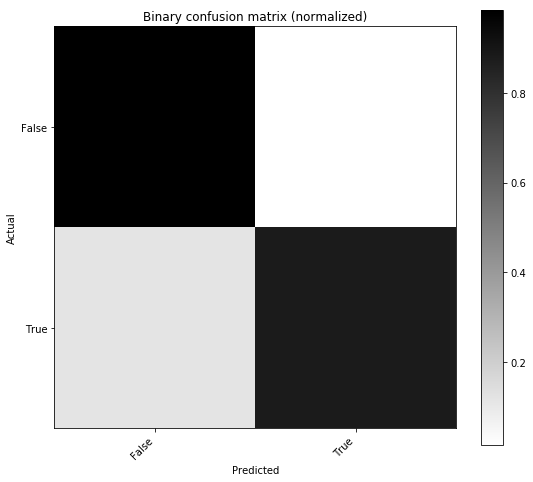

population: 99683
P: 159
N: 99524
PositiveTest: 1615
NegativeTest: 98068
TP: 140
TN: 98049
FP: 1475
FN: 19
TPR: 0.8805031446540881
TNR: 0.9851794542020015
PPV: 0.08668730650154799
NPV: 0.9998062568829792
FPR: 0.014820545797998472
FDR: 0.913312693498452
FNR: 0.11949685534591195
ACC: 0.9850124895920067
F1_score: 0.15783540022547915
MCC: 0.2736347432893736
informedness: 0.8656825988560897
markedness: 0.08649356338452718
prevalence: 0.00159505632856154
LRP: 59.41097963969727
LRN: 0.12129450612904305
DOR: 489.8076717216771
FOR: 0.0001937431170208427


In [19]:
y_predicted1 = np.array(logistic.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()
confusion_matrix1.print_stats()

# Logistic Regression with Balanced class weights

In [20]:
best_c, best_fnr = 1, 1
for _ in range(20):
    c = random.uniform(1, 10000)
    logistic = linear_model.LogisticRegression(C=c, class_weight="balanced")
    logistic.fit(X_train, y_train)
    #print("Score: ", logistic.score(X_test, y_test))
    y_predicted2 = np.array(logistic.predict(X_test))
    y_right2 = np.array(y_test)
    confusion_matrix2 = ConfusionMatrix(y_right2, y_predicted2)
    #print("Confusion matrix:\n%s" % confusion_matrix2)
    #confusion_matrix2.plot(normalized=True)
    #plt.show()
    #confusion_matrix2.print_stats()
    fnr = confusion_matrix2.stats()['FNR']
    if fnr < best_fnr:
        best_fnr = fnr
        best_c = c
print("Best C is {0} with best FNR of {1}.".format(best_c, best_fnr))

c:\users\jenisha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jenisha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jenisha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jenisha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jenisha\appdata\local\programs\python\pytho

Best C is 9246.81886772291 with best FNR of 0.10062893081761007.
